In [ ]:
import numpy as np
import matplotlib.pyplot as plt
 
def forward_euler():
    n: int = 5
    t0: float = 0
    y0: float = 1
    a: float = t0
    b: float = 0.4
    h: float = 0.1
    def f(t, y): return (2 * t) + y
    def exact(t): return (-2) * (t + 1) + 3 * np.exp(t)
    t = np.zeros(n + 1)
    y = np.zeros(n + 1)
    ye = np.zeros(n + 1)
    
    t[0] = t0
    y[0] = y0
    ye[0] = y0
    print("step", "ti", "yi", "exact", sep="\t")
    for i in range(0, n):
        t[i + 1] = t0 + h * (i + 1)
        y[i + 1] = y[i] + h * f(t[i], y[i])
        ye[i + 1] = exact(t[i + 1])
        print(i, round(t[i], 4), round(y[i], 4), round(ye[i], 4), sep="\t")
        
    plt.plot(t, y, 'bo--', label='Approximate')
    plt.plot(t, ye, 'g', label="Exact")
    plt.title('Approximate and Exact Solution for Explicit Euler Method')
    plt.xlabel('t')
    plt.ylabel('y')
    plt.grid()
    plt.legend(loc='upper right')
    plt.show()
    
forward_euler()


step	ti	yi	exact
0	0.0	[1.]	1.0
1	0.1	[1.1333]	1.1155
2	0.2	[1.3037]	1.2642
3	0.3	[1.5152]	1.4496
4	0.4	[1.7725]	1.6755


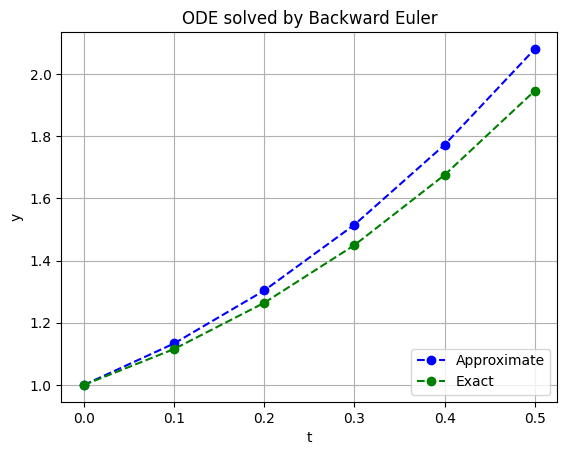

In [19]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

def backward_euler(f, e):
  tspan = np.array([0.0, 1.0])
  y0 = 1
  n = 5
  if (np.ndim(y0) == 0):
    m = 1
  else:
    m = len(y0)

  t = np.zeros(n + 1)
  y = np.zeros([n + 1, m])
  ye = np.zeros(n + 1)
  dt = 0.1

  t[0] = tspan[0]
  y[0, :] = y0
  ye[0] = y0

  print("step", "ti", "yi", "exact", sep="\t")
  for i in range(0, n):

    to = t[i]
    yo = y[i, :]
    tp = t[i] + dt
    tp = t[i] + dt
    yp = yo + dt * f(to, yo)   
    yp = fsolve(backward_euler_residual, yp, args=(f, to, yo, tp))   
    t[i + 1] = tp
    y[i + 1, :] = yp[:]
    ye[i + 1] = e(t[i + 1])
    print(i, np.round(t[i], 4), np.round(y[i], 4), np.round(ye[i], 4), sep="\t")

  plt.clf()

  plt.plot(t, y, 'bo--', label='Approximate')
  plt.plot(t, ye, 'go--', label="Exact")
  plt.grid(True)
  plt.xlabel('t')
  plt.ylabel('y')
  plt.title('ODE solved by Backward Euler')
  plt.legend(loc='lower right')
  plt.show(block=False)
  plt.close()


def backward_euler_residual(yp, f, to, yo, tp):
  value = yp - yo - (tp - to) * f(tp, yp)
  return value


if (__name__ == '__main__'):
  backward_euler(f=lambda t, y: (2 * t) + y,
                 e=lambda t: (-2) * (t + 1) + 3 * np.exp(t))


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class Euler:
    __n: int
    __h: float
    __a: float
    __b: float
    __t0: float
    __y0: float
    __f: any
    __t: float = []
    __y: float = []
    __exact: any
    __e: float = []

    def __init__(self, n: int, b: float, t0: float, y0: float, f: any, exact: any, h: float = 0):
        self.__n = n
        self.__a = t0
        self.__b = b
        if h == 0:
            self.__h = (self.__b - self.__a) / (n - 1)
        else:
            self.__h = h
        self.__t0 = t0
        self.__y0 = y0
        self.__f = f
        self.__t = np.zeros(self.__n + 1)
        self.__y = np.zeros(len(self.__t))
        self.__y2 = np.zeros(len(self.__t))
        self.__t[0] = self.__t0
        self.__y[0] = self.__y0
        self.__y2[0] = self.__y0
        self.__exact = exact
        
        self.implicit_method()
        self.explicit_method()
        self.__DrawGraph()

    def implicit_method(self): # bad solution, don't use it
        for i in range(0, self.__n):
            self.__t[i + 1] = self.__t0 + self.__h * (i + 1)

            ye = self.__y[i] + self.__h * self.__f(self.__t[i], self.__y[i])

            self.__y[i + 1] = self.__y[i] + \
                self.__h * self.__f(self.__t[i + 1], ye)

        self.__e = self.__exact(self.__t)

    def explicit_method(self):
        for i in range(0, self.__n):
            self.__t[i + 1] = self.__t0 + self.__h * (i + 1)
            self.__y2[i + 1] = self.__y2[i] + self.__h * \
                self.__f(self.__t[i], self.__y2[i])

        self.__e = self.__exact(self.__t)

    def __DrawGraph(self):
        self.__t = np.array(self.__t)
        plt.plot(self.__t, self.__y2, 'bo--', label='Explicit')
        plt.plot(self.__t, self.__e, 'g', label="Exact")
        plt.plot(self.__t, self.__y, 'ro--', label="Implicit")
        plt.title(
            loc="center", label="Solution for 2t+y function with Implicit and Explicit Euler Method")
        plt.xlabel('t')
        plt.ylabel('y')
        plt.grid()
        plt.legend(loc='upper left')
        plt.show()


euler6: Euler = Euler(n=4, b=0.4, t0=0, y0=1, f=lambda t, y: (
    2 * t) + y, exact=lambda t: (-2) * (t + 1) + 3 * np.exp(t))
